# Restarting with the info I have learned
This is my 3rd restart. I restarted by pulling out the patents in the target class with the code I improved for later use in processing the xml data.

### create what is known as a list of predictor-response pairs. 
This is a list of two-tuples that contain the most appropriate class label and the raw document text, as two separate components

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn import metrics
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline


# Convert "labels" ('usMainClass') into dtype category
Tips on specifying model
Forcing categorical: the **‘usMainClass’ is automatical detected as a int64 dtype, and but this is more difficult for the ML models to recognize as different entities. Changing it to categorical dtype will make sure each of its different values are treated as different entities.**

An integer column can be forced to be treated as categorical using:
> model = ols('VIQ ~ C(Gender)', data).fit()

Will creating a category datatype make the usMainClass useable as a classifier?

In [8]:
names = ['claims', 'usMainClass', 'description', 'artUnit', 'patnum'] 
data = pd.read_csv('923freshStart.csv', names=names)

In [9]:
data.head()

,claims,usMainClass,description,artUnit,patnum
0,claim id clm num claim text ornamental design ...,424,brief description drawings description brief d...,2912,USD0513109
1,claim id clm num claim text ornamental design ...,455,brief description drawings description brief d...,2912,USD0513233
2,claim id clm num claim text ornamental design ...,455,brief description drawings description brief d...,2912,USD0513234
3,claim id clm num claim text ornamental design ...,701,brief description drawings description brief d...,2912,USD0513235
4,claim id clm num claim text ornamental design ...,455,brief description drawings description brief d...,2912,USD0513236


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 5 columns):
claims         19439 non-null object
usMainClass    19439 non-null int64
description    19439 non-null object
artUnit        19439 non-null int64
patnum         19439 non-null object
dtypes: int64(2), object(3)
memory usage: 759.4+ KB


In [11]:
data['usMainClass'] = data['usMainClass'].astype("category")

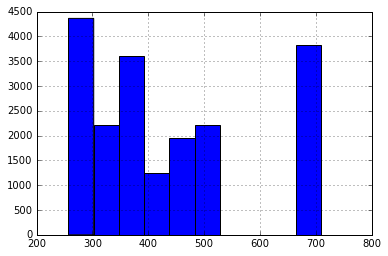

In [12]:
data['usMainClass'].hist()

In [35]:
data_full_target = data['usMainClass']

In [36]:
data_full_input = data['description']

In [14]:
data['artUnit'] = data['artUnit'].astype("category")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 5 columns):
claims         19439 non-null object
usMainClass    19439 non-null category
description    19439 non-null object
artUnit        19439 non-null category
patnum         19439 non-null object
dtypes: category(2), object(3)
memory usage: 515.3+ KB


In [16]:
data['usMainClass'].value_counts()

257    4363
370    2338
345    2219
514    2213
709    1968
455    1956
348    1272
424    1249
707    1034
701     827
dtype: int64

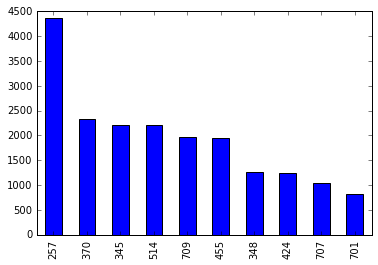

In [17]:
data['usMainClass'].value_counts().plot(kind='bar')

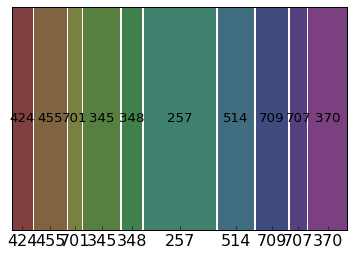

In [18]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 16.0
mosaic(data, ['usMainClass']);

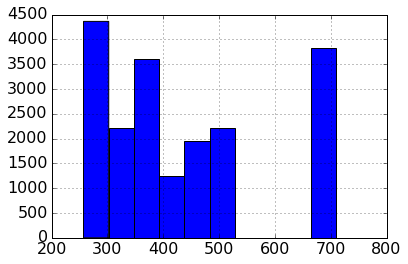

In [19]:
data['usMainClass'].hist()

In [20]:
dosData = data[['description','usMainClass']]

In [21]:
dosData

,description,usMainClass
0,brief description drawings description brief d...,424
1,brief description drawings description brief d...,455
2,brief description drawings description brief d...,455
3,brief description drawings description brief d...,701
4,brief description drawings description brief d...,455
5,brief description drawings description brief d...,455
6,brief description drawings description brief d...,455
7,brief description drawings description brief d...,345
8,brief description drawings description brief d...,455
9,brief description drawings description brief d...,455


In [22]:
null_description = pd.isnull(dosData['description'])

In [23]:
count = 0
for row in null_description:
    if row == True:
        count = count+1 
    else:
        count = count +0
print count

0


In [24]:
null_class = pd.isnull(dosData['usMainClass'])

In [25]:
count_nc = 0
for row in null_class:
    if row == True:
        count_nc = count_nc+1 
    else:
        count_nc = count_nc +0
print count_nc

0


In [26]:
train, test = train_test_split(data, test_size = 0.3)

In [27]:
train['usMainClass'].value_counts()

257    3069
370    1628
514    1532
345    1530
455    1388
709    1377
348     887
424     861
707     740
701     595
dtype: int64

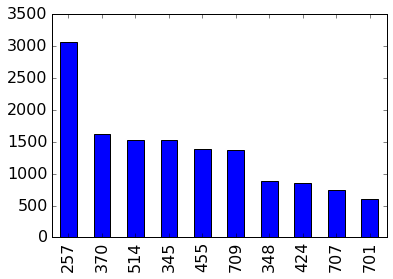

In [28]:
train['usMainClass'].value_counts().plot(kind='bar')

In [29]:
test['usMainClass'].value_counts()

257    1294
370     710
345     689
514     681
709     591
455     568
424     388
348     385
707     294
701     232
dtype: int64

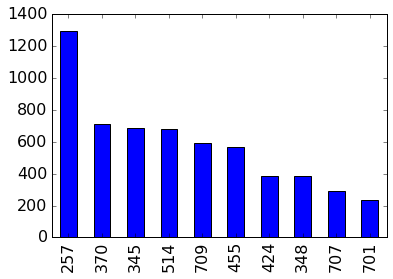

In [30]:
test['usMainClass'].value_counts().plot(kind='bar')

In [31]:
trainInput = train['description']

In [32]:
trainTarget = train['usMainClass']

In [33]:
text_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', MultinomialNB()),])

In [34]:
text_clf = text_clf.fit(trainInput, trainTarget)

### validation --------------------left off

In [41]:
from sklearn import cross_validation

In [46]:
num_folds = 3
num_instances = len(data_full_input)
seed = 2
model = text_clf
kfold = cross_validation.KFold(n=num_instances, n_folds=num_folds, random_state=seed)
results = cross_validation.cross_val_score(model, data_full_input, data_full_target, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)
 

Accuracy: 56.680% (1.836%)


In [47]:
testInput = test['description']
testTarget = test['usMainClass']

In [48]:
predicted = text_clf.predict(testInput)
np.mean(predicted == testTarget)

0.57921810699588472

In [24]:
print(metrics.classification_report(testTarget, predicted))
metrics.confusion_matrix(testTarget, predicted)

             precision    recall  f1-score   support

        257       0.62      1.00      0.76      1264
        345       0.54      0.46      0.50       694
        348       1.00      0.01      0.02       387
        370       0.47      0.87      0.61       690
        424       0.00      0.00      0.00       387
        455       0.68      0.14      0.23       565
        514       0.65      0.98      0.78       674
        701       1.00      0.10      0.17       262
        707       0.00      0.00      0.00       318
        709       0.46      0.58      0.51       591

avg / total       0.55      0.56      0.47      5832



/Users/robert/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[1259,    1,    0,    0,    0,    0,    4,    0,    0,    0],
       [ 249,  319,    0,   34,    0,    8,    4,    0,    0,   80],
       [ 179,  136,    4,   48,    0,    4,    0,    0,    0,   16],
       [  22,    4,    0,  598,    0,   11,    0,    0,    0,   55],
       [  53,    0,    0,    0,    0,    0,  334,    0,    0,    0],
       [ 123,   33,    0,  296,    0,   80,    5,    0,    0,   28],
       [  10,    0,    0,    0,    0,    0,  663,    0,    0,    1],
       [ 128,   22,    0,   61,    0,   12,    0,   25,    0,   14],
       [  17,   49,    0,   38,    0,    0,    6,    0,    0,  208],
       [   6,   22,    0,  210,    0,    2,   10,    0,    0,  341]])

### 3% improvement over freshStart.ipyn by changing the usMainClass into a category. Also I have a larger data set by 6,000 patents.

# Linear SVM

In [25]:
textOGSVM_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier()),])
textOGSVM_clf = textOGSVM_clf.fit(trainInput, trainTarget)

In [26]:
svm_OG_predicted = textOGSVM_clf.predict(testInput)
np.mean(svm_OG_predicted == testTarget)  

0.71913580246913578

In [27]:
print(metrics.classification_report(testTarget, svm_OG_predicted))
metrics.confusion_matrix(testTarget, svm_OG_predicted)

             precision    recall  f1-score   support

        257       0.94      0.97      0.96      1264
        345       0.71      0.63      0.67       694
        348       0.65      0.58      0.61       387
        370       0.61      0.66      0.64       690
        424       0.68      0.68      0.68       387
        455       0.61      0.63      0.62       565
        514       0.82      0.82      0.82       674
        701       0.74      0.73      0.74       262
        707       0.57      0.43      0.49       318
        709       0.51      0.57      0.54       591

avg / total       0.72      0.72      0.72      5832



array([[1230,   13,    9,    4,    2,    3,    2,    1,    0,    0],
       [  30,  440,   65,   10,    0,   44,    1,   15,   37,   52],
       [  23,   68,  225,   17,    0,   23,    0,    9,    8,   14],
       [   4,    2,    7,  456,    0,  109,    0,    7,    6,   99],
       [   2,    0,    2,    0,  264,    0,  119,    0,    0,    0],
       [   5,   28,    7,  104,    1,  357,    0,   22,    4,   37],
       [   1,    0,    0,    0,  117,    0,  555,    0,    0,    1],
       [   5,   11,    6,    7,    1,   25,    0,  192,    4,   11],
       [   4,   31,   11,    8,    2,    4,    0,    8,  138,  112],
       [   1,   27,   15,  136,    0,   25,    2,    5,   43,  337]])

In [19]:
textSVM_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, n_iter=5, random_state=42)),])
textSVM_clf = textSVM_clf.fit(trainInput, trainTarget)

In [20]:
svm_predicted = textSVM_clf.predict(testInput)
np.mean(svm_predicted == testTarget)  

0.70096021947873799

In [21]:

print(metrics.classification_report(testTarget, svm_predicted))
metrics.confusion_matrix(testTarget, svm_predicted)

             precision    recall  f1-score   support

        257       0.90      0.99      0.94      1355
        345       0.62      0.72      0.67       634
        348       0.70      0.51      0.59       366
        370       0.57      0.69      0.62       709
        424       0.73      0.22      0.33       366
        455       0.65      0.56      0.60       587
        514       0.68      0.96      0.80       682
        701       0.73      0.79      0.76       219
        707       0.64      0.33      0.43       310
        709       0.55      0.46      0.50       604

avg / total       0.70      0.70      0.68      5832



array([[1335,    5,    4,    1,    0,    2,    7,    1,    0,    0],
       [  58,  458,   33,   12,    1,    9,    6,   14,   12,   31],
       [  22,  101,  188,   22,    0,   13,    1,   11,    2,    6],
       [  10,    5,    9,  488,    0,  126,    9,    7,    4,   51],
       [  22,    2,    1,    0,   79,    1,  260,    1,    0,    0],
       [  21,   60,    5,  119,    0,  331,    4,   16,    1,   30],
       [   0,    0,    0,    0,   26,    0,  656,    0,    0,    0],
       [   4,   10,    3,    5,    0,   16,    1,  173,    3,    4],
       [   5,   54,   11,   18,    2,    1,   10,    6,  102,  101],
       [   3,   47,   16,  194,    0,   14,    7,    9,   36,  278]])

In [90]:
def plot_classification_report(cr, title='Classification report ', with_avg_total=False, cmap=plt.cm.Blues):

    lines = cr.split('\n')

    classes = []
    plotMat = []
    for line in lines[2 : (len(lines) - 3)]:
        #print(line)
        t = line.split()
        # print(t)
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        print(v)
        plotMat.append(v)

    if with_avg_total:
        aveTotal = lines[len(lines) - 1].split()
        classes.append('avg/total')
        vAveTotal = [float(x) for x in t[1:len(aveTotal) - 1]]
        plotMat.append(vAveTotal)


    plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

[0.9, 0.99, 0.94]
[0.62, 0.72, 0.67]
[0.7, 0.51, 0.59]
[0.57, 0.69, 0.62]
[0.73, 0.22, 0.33]
[0.65, 0.56, 0.6]
[0.68, 0.96, 0.8]
[0.73, 0.79, 0.76]
[0.64, 0.33, 0.43]
[0.55, 0.46, 0.5]


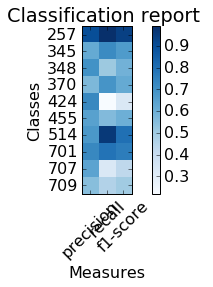

In [91]:
sampleClassificationReport = metrics.classification_report(testTarget, svm_predicted)
plot_classification_report(sampleClassificationReport)

### 5% increase over freshStart.ipyn by changing the usMainClass into a category. Also I have a larger data set by 6,000 patents.

** Base line of 90% met for class 257** This tells me that more data is needed for the samples to properly be labeled since 257 has 1380, while the other classes have lower accuracy and lower support. While this is just the ammount in the test sample, it is indicative of the training sample.

In [36]:
textknn_clf = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('clf', KNeighborsClassifier()),])
textknn_clf = text_clf.fit(trainInput, trainTarget)

In [38]:
textknn_clf.predict(testInput)

array([370, 257, 709, ..., 257, 514, 455])

In [39]:
predictedknn = textknn_clf.predict(testInput)
np.mean(predictedknn == testTarget) 

0.58796296296296291

### increase of 1% over freshStart.ipyn

In [40]:
print(metrics.classification_report(testTarget, predictedknn))
metrics.confusion_matrix(testTarget, predictedknn)

             precision    recall  f1-score   support

        257       0.66      1.00      0.79      1380
        345       0.54      0.49      0.52       673
        348       1.00      0.01      0.02       380
        370       0.49      0.88      0.62       699
        424       0.00      0.00      0.00       362
        455       0.70      0.16      0.27       560
        514       0.65      0.99      0.79       658
        701       0.97      0.15      0.26       245
        707       0.00      0.00      0.00       278
        709       0.47      0.55      0.51       597

avg / total       0.57      0.59      0.50      5832



/Users/robert/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[1374,    0,    0,    1,    0,    0,    4,    0,    0,    1],
       [ 230,  332,    0,   27,    0,    4,    5,    0,    0,   75],
       [ 144,  156,    3,   53,    0,    5,    4,    0,    0,   15],
       [  24,    6,    0,  612,    0,   13,    7,    0,    0,   37],
       [  53,    0,    0,    0,    0,    0,  309,    0,    0,    0],
       [ 119,   41,    0,  272,    0,   92,    2,    1,    0,   33],
       [   6,    0,    0,    0,    0,    0,  651,    0,    0,    1],
       [ 111,   21,    0,   43,    0,   18,    1,   36,    0,   15],
       [   9,   32,    0,   37,    0,    0,    6,    0,    0,  194],
       [  17,   27,    0,  215,    0,    0,    9,    0,    0,  329]])

In [89]:
svm_predicted.plot(kind='bar')


AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Future strategies to test: create multiple columns to convert classes into a 1 or 0 from
www.astroml.org/sklearn_tutorial/general_concepts.html